## Final Project Submission

Please fill out:
* Student name: Stella Wanjiru Kiarie
* Student pace: full time(Remote)
* Scheduled project review date/time: 
* Instructor name: Nikita Njoroge 
* Blog post URL:


In [40]:
# Your code here - remember to use markdown cells for comments as well!

 ### BUSINESS UNDERSTANDING 

INTRODUCTION
 
The company is seeking to diversify its operations by acquiring and operating private and commercial aircrafts. In the case, the company seeks data driven insights to determine which aircrafts present the lowest operational risk to venture in.

In this notebook will  provide intense data cleaning, analysis and visualization to address the business problem of determining the lowest-risk aircraft for the company to venture in within the aviation industry. 
The goal is to leverage historical aviation accident data to generate insights and recommendations to the Head of the New Aviation Division. The insights should help the business decide on which aircraft to purchase. 

 ### DATA UNDERSTANDING 

This analysis will be leverage comprehensive aviation dataset provided by the National Transport Safety Board(NTSB)

The data collected  from 1962 to 2023
File: Aviation_Data csv in the data folder
The dataset contains 90348 rows of data and 31 columns to provide content on aviation safety 

This dataset from NTSB is highly suitable for this project as it provides historical, comprehesive and standard records of aviation accidents and incidents in US and International waters which is directly relevant to this project to determine which aircrafts pose the lowest operational risk. 




Some essential features in the dataset include 

        Aircraft Make

        Aircraft Model

        Injury Severity 

        Total Fatal Injury

        Purpose of Flight
        
        Aircraft Damage

However, the dataset is suitable for the project but has some limitations and implications that must be managed 


    1. The dataset lacks some operational data. In the case this dataset provides only accident data such as aircraft category by Accident but doesnt not provide content such as total no. of flight hours , total departures for a given make/ model over a period of time

    2. Lack of data Consistency:The naming conventions in the aviation industry have changed over time since 1962. There are variations like past years there was a model 737 which changed the convention naming to B737-300 after some time. 


The steps will be loading dataset, inspecting and understanding the dataset and later to data cleaning, analysis and visualization. 

## Import Relevant Libraries 

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [42]:
#Loading dataset in csv format 
aviation=pd.read_csv('data/Aviation_Data.csv', encoding='latin-1', low_memory=False)
aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [43]:
#The number of rows and columns in the dataset
aviation.shape

(90348, 31)

In [44]:
# Take a look at the columns in the dataset
aviation.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [45]:
#Drop columns that are irrelevant in achieving the data analysis objectives 
aviation.drop(['Event.Id', 'Accident.Number', 'Event.Date',
        'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
        'Airport.Name', 'Registration.Number','Amateur.Built','FAR.Description',
        'Schedule', 'Air.carrier','Broad.phase.of.flight', 'Report.Status',
        'Publication.Date'], 
        axis=1, 
        inplace=True)

In [46]:
#Checking missing values for the remaining columns 
aviation.columns

Index(['Investigation.Type', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Number.of.Engines',
       'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition'],
      dtype='object')

In [47]:
# Checking the total sum of missing values in columns 
aviation.isna().sum()


Investigation.Type            0
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Make                       1522
Model                      1551
Number.of.Engines          7543
Engine.Type                8536
Purpose.of.flight          7651
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
dtype: int64

In [48]:
#Lets iterate over every column and calculate the relative frequency of the top five common values. 
#An important step in Exploratory Data Analysis. 
for col in aviation.columns:
    print(col, '\n', aviation[col].value_counts(normalize=True).head(), '\n\n')

Investigation.Type 
 Accident      0.940973
Incident      0.042879
25-09-2020    0.007770
26-09-2020    0.000664
02-02-2021    0.000432
Name: Investigation.Type, dtype: float64 


Injury.Severity 
 Non-Fatal    0.766387
Fatal(1)     0.070168
Fatal        0.059871
Fatal(2)     0.042224
Incident     0.025248
Name: Injury.Severity, dtype: float64 


Aircraft.damage 
 Substantial    0.748562
Destroyed      0.217317
Minor          0.032732
Unknown        0.001389
Name: Aircraft.damage, dtype: float64 


Aircraft.Category 
 Airplane      0.855360
Helicopter    0.106544
Glider        0.015734
Balloon       0.007155
Gyrocraft     0.005358
Name: Aircraft.Category, dtype: float64 


Make 
 Cessna    0.250231
Piper     0.135422
CESSNA    0.055412
Beech     0.048747
PIPER     0.031984
Name: Make, dtype: float64 


Model 
 152          0.026656
172          0.019775
172N         0.013109
PA-28-140    0.010496
150          0.009336
Name: Model, dtype: float64 


Number.of.Engines 
 1.0    0.840312
2

## Dealing with Missing values 

In [49]:
# Lets deal with Categorical columns 
#1. Engine type column 
aviation['Engine.Type'].unique()
# there placeholder values ['nan',None,NONE,UNK,Unknown]

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [50]:
#Fill missing values in Engine type column with unknown
aviation['Engine.Type'].fillna(value='NOT KNOWN', inplace=True)


In [51]:
#Lets replace the placeholders "Unknown,nan,None,NONE and UNK" with 'NOT KNOWN'
aviation['Engine.Type']=aviation['Engine.Type'].map(lambda x: 'NOT KNOWN'if  x=='UNK' or x == 'None' or x == 'NONE' else x)

In [52]:
#Lets execute the Purpose of flight and Aircraft Damage columns
#By imputing nan values with NOT KNOWN
# Assuming your DataFrame is named 'df'
aviation['Purpose.of.flight'].fillna(value='NOT KNOWN', inplace=True)
aviation['Aircraft.damage'].fillna(value='NOT KNOWN', inplace=True)
aviation['Aircraft.damage'] = aviation['Aircraft.damage'].map(lambda x: 'NOT KNOWN' if x == 'Unknown' else x)

In [53]:
#since the make and model category hae small amount of missing values
#Lets drop missing rows in the columns
aviation=aviation.dropna(subset=['Make','Model'])

In [54]:
# FILL nan values in the weather column with NOT KNOWN
aviation['Weather.Condition'].unique

<bound method Series.unique of 0        UNK
1        UNK
2        IMC
3        IMC
4        VMC
        ... 
90343    NaN
90344    NaN
90345    VMC
90346    NaN
90347    NaN
Name: Weather.Condition, Length: 88777, dtype: object>

In [55]:
#There are place holders values "UNK" and Unk
#Will replace the placeholder values with NOT KNOWN
aviation['Weather.Condition'].fillna(value='NOT KNOWN', inplace=True)

In [56]:
aviation['Weather.Condition']=aviation['Weather.Condition'].map(lambda x: 'NOT KNOWN' if x =='Unk' or x=="UNK" else x)

In [57]:
aviation= aviation[aviation['Aircraft.Category']=='Airplane']
aviation['Aircraft.Category'].value_counts()

Airplane    27580
Name: Aircraft.Category, dtype: int64

# IMPUTING MISSING VALUES IN THE NUMERIC COLUMNS WITH THEIR MEDIAN 

In [58]:
#Lets deal with the numeric Categories 
#Number of engines, Total serious injuries, total minor injuries, total uninjured 
aviation.fillna(value=aviation['Number.of.Engines'].median(),inplace=True)
aviation.fillna(value=aviation['Total.Serious.Injuries'].median(),inplace=True)
aviation.fillna(value=aviation['Total.Minor.Injuries'].median(),inplace=True)
aviation.fillna(value=aviation['Total.Uninjured'].median(),inplace=True)
aviation.fillna(value=aviation['Total.Fatal.Injuries'].median(),inplace=True)

In [59]:
#Lets Standardize the make and model columns 
aviation['Make'] = aviation['Make'].str.title()
aviation['Model'] = aviation['Model'].str.title() 

 ## DATA ANALYSIS 

## Which makes are more prone to fatal injuries?


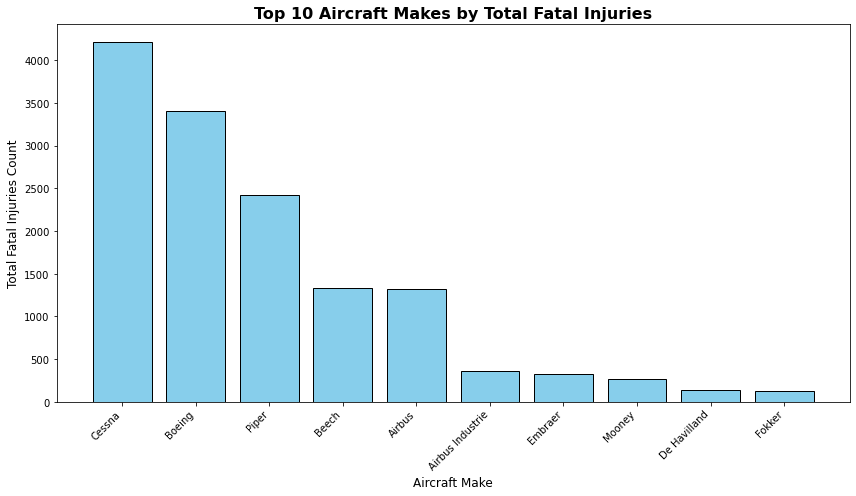

In [60]:
#Group by Airplane Make by the Total.Fatal.Injuries 
fatal_injuries_by_make = (
    aviation.groupby('Make')['Total.Fatal.Injuries']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
#Visualizing a bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(
    fatal_injuries_by_make.index,
    fatal_injuries_by_make.values,
    color='skyblue',
    edgecolor='black'
)
plt.title(
    'Top 10 Aircraft Makes by Total Fatal Injuries',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('Aircraft Make', fontsize=12)
plt.ylabel('Total Fatal Injuries Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## Insights gained
 The bar chart analyzes the top 10 makes by total fatal injuries. From the chart. It is  clear that CESSNA has the highest risk of fatality incase an acident occurs.  On the other hand, FOKKER has the lowest risk to fatality incase an accident occurs. 

## Recommendation 
 
It is recommended that the company invests in Aircrafts makes such as DE HAVILLAND Aand FOKKER which have a lower risk of fatality


 # Insight 2: Number of Fatal Injuries by Purpose of Flight

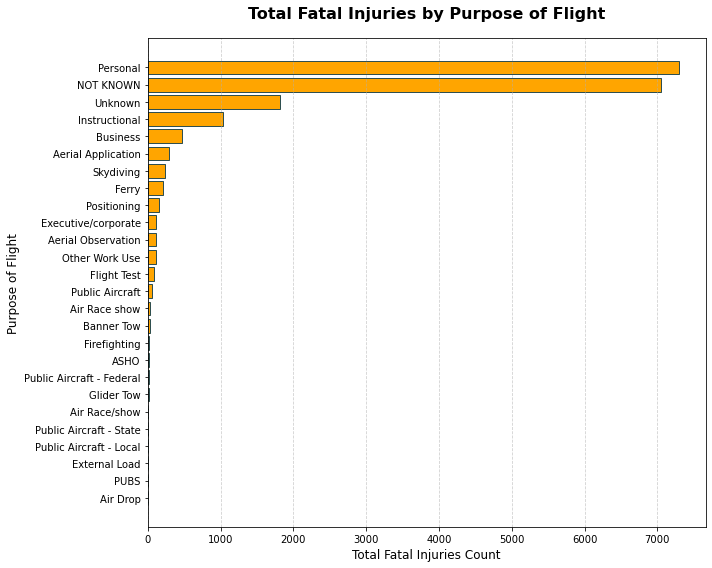

In [61]:
# Grouping Purpose of flights by The total fatal injuries 
fatal_injuries_by_purpose = (
    aviation.groupby('Purpose.of.flight')['Total.Fatal.Injuries']
    .sum()
    .sort_values(ascending=True)
)
plt.figure(figsize=(10, 8))
bars = plt.barh(
    fatal_injuries_by_purpose.index,
    fatal_injuries_by_purpose.values,
    color='Orange',
    edgecolor='darkslategray'
)
plt.title(
    'Total Fatal Injuries by Purpose of Flight',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Total Fatal Injuries Count', fontsize=12)
plt.ylabel('Purpose of Flight', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 

## Insights Gained 

From the chart above, it is evident that Aircrafts used for personal purpose have the highest risk to fatal injuries. Hence its not recommended for the company to venture in aircrafts for personal and private use. 

Recommendation
The company company to the aviation industry for commercial purposes, either for ASHO, as  Public crafts  and also for business purposes since their risks to fatal injuries is low

## How is the Aircraft Type based on their engine Type? For the company to decide on which engines to invest on 

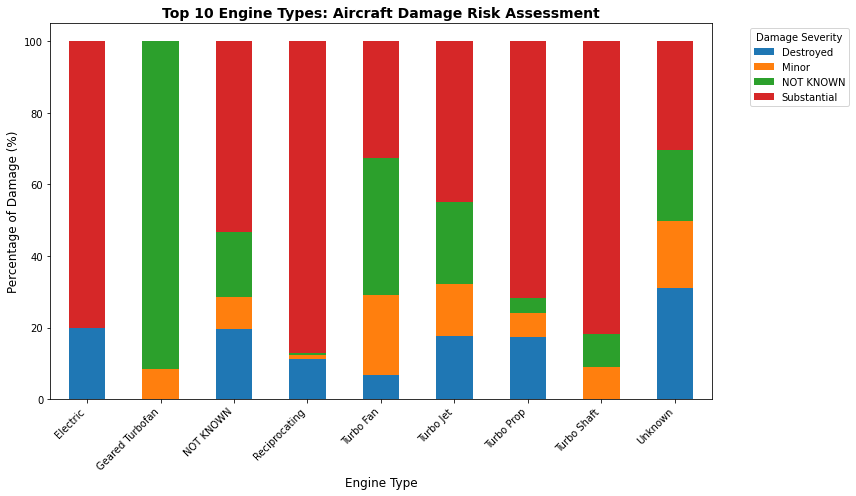

In [62]:
#  Identify the Top 10 Most Frequent Engine Types
top_10_engines = aviation['Engine.Type'].value_counts().head(10).index
df_filtered = aviation[aviation['Engine.Type'].isin(top_10_engines)]
risk_data_top_10 = pd.crosstab(
    df_filtered['Engine.Type'],
    df_filtered['Aircraft.damage'],
    normalize='index'
) * 100
risk_data_top_10.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7) 
)
plt.title(
    'Top 10 Engine Types: Aircraft Damage Risk Assessment',
    fontsize=14,
    fontweight='bold'
)
plt.ylabel('Percentage of Damage (%)', fontsize=12)
plt.xlabel('Engine Type', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate for better visibility of the 10 labels
plt.legend(title='Damage Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Insights Gained 

 From the chart above, Reciprocating engine have the highest risk of Aircraft damage hence not a good venture to dive in. Similar engines such as Electric,Turbo Prop and Turbo Shaft have high substastial damage. Air crafts with Turbo fan engines are highly recommended 

## Exporting the cleaned dataset to  csv 

In [63]:
aviation.to_csv('cleaned_data.csv', index=False)